# COURSE: Master math by coding in Python
## SECTION: Probability theory

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# VIDEO: Histograms and probability densities

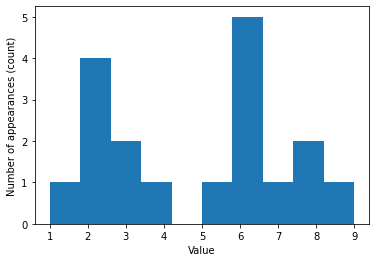

(array([1, 4, 2, 1, 1, 5, 1, 2, 1]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


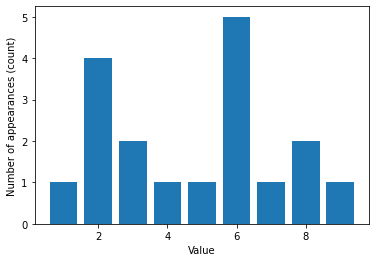

In [2]:
data = [1,2,2,2,2,3,4,5,6,6,6,6,7,8,9,8,6,3]

plt.hist(data)
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()

# with outputs
histdata = np.histogram(data,bins=np.arange(1,11))
print(histdata)
plt.bar(histdata[1][:-1],histdata[0])
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()


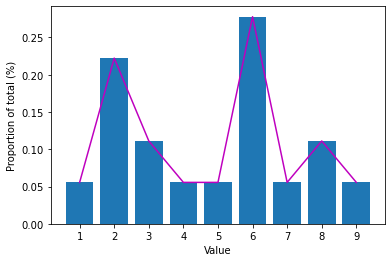

In [6]:
# convert to probability
x = histdata[1][:-1]
y = histdata[0]
yP = y/np.sum(y)

plt.bar(x,yP)
plt.plot(x,yP,'m')
plt.xlabel('Value')
plt.xticks(np.arange(1,10))
plt.ylabel('Proportion of total (%)')
plt.show()

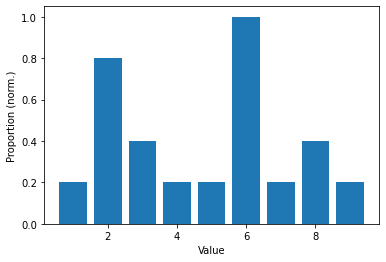

In [5]:
# another option: normalize to max=1 (not a probability distribution, but often useful)
yN = y/np.max(y)

plt.bar(x,yN)
plt.xlabel('Value')
plt.ylabel('Proportion (norm.)')
plt.show()

### Exercise

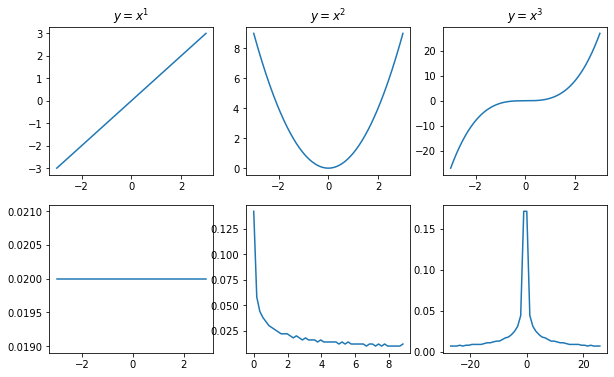

In [9]:
# pdensities of x, x^2, and x^3
x = np.linspace(-3,3,1000)

fig,ax = plt.subplots(2,3)
fig.set_size_inches(10,6) # width, height in inches

for i in range(3):
    
    # histogram of the function
    y = x**(i+1)
    hd = np.histogram(y,50)
    yp = hd[0] / sum(hd[0])
    
    # plot the function
    ax[0,i].plot(x,y)
    ax[0,i].set_title('$y=x^{%g}$' %(i+1))
    
    # plot its distribution
    ax[1,i].plot(hd[1][:-1],yp)
    
    
plt.show()

# VIDEO: Virtual coin tosses

### Exercise

# VIDEO: Building distributions from random numbers

### Exercise

# VIDEO: The central limit theorem

### Exercise

# VIDEO: Joint probability distributions 

### Exercise

# VIDEO: Probability BUG HUNT!